
Purpose of the Dataset

The primary purpose of this dataset is to analyze and predict customer churn. By understanding the factors that contribute to churn, the telecom company can develop strategies to retain customers and reduce churn rates.

Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_excel(r"C:\Users\User\Documents\IRON HACK DA 2024\Sixth Project\Sixth-ML\Data\Raw data\Telco_customer_churn.xlsx")

# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.describe(include='all'))


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

Data Preprocessing

In [2]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values in 'Churn Reason' by filling with mode
df["Churn Reason"] = df["Churn Reason"].fillna(df["Churn Reason"].mode()[0])

# Check for duplicates
print(df.duplicated().sum())

# Drop columns not relevant for model training
df = df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Churn Reason'])

# Convert 'Total Charges' to numeric, filling any errors with 0
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)

# One-hot encode categorical variables
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
                       'Phone Service', 'Multiple Lines', 'Internet Service', 
                       'Online Security', 'Online Backup', 'Device Protection', 
                       'Tech Support', 'Streaming TV', 'Streaming Movies', 
                       'Contract', 'Paperless Billing', 'Payment Method']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convert 'Churn Label' to binary
df_encoded['Churn Label'] = df_encoded['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check data types
print(df_encoded.dtypes)


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64
0
Latitude                                  float64
Longitude                                 float64
Tenure Months              

Feature Scaling

In [3]:
# Define features (X) and target (y)
X = df_encoded.drop('Churn Label', axis=1)
y = df_encoded['Churn Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shape of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5634, 35)
Shape of X_test: (1409, 35)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


Data Visualization

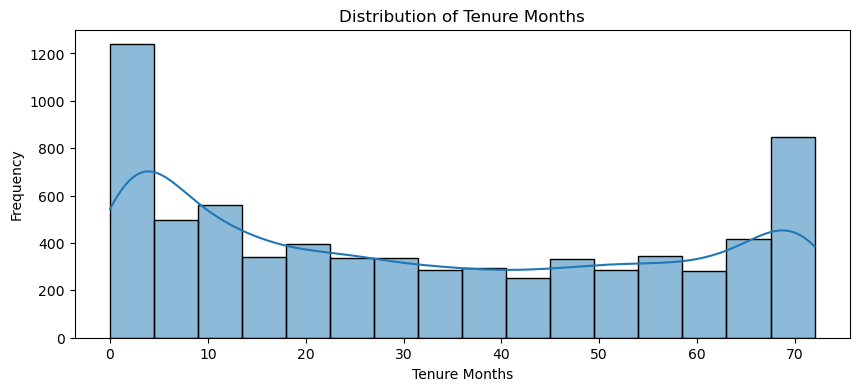

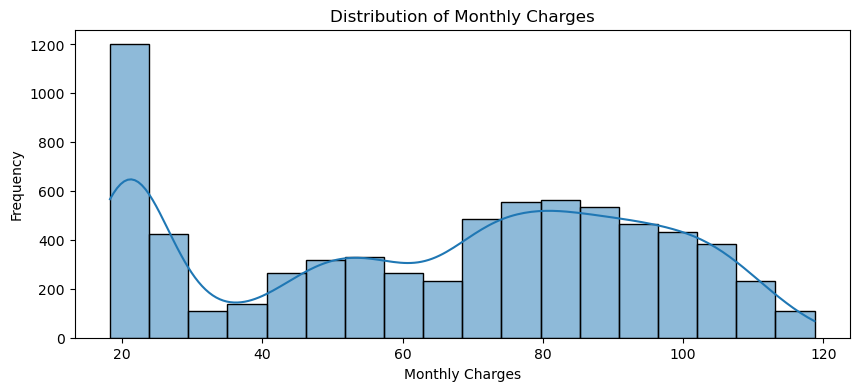

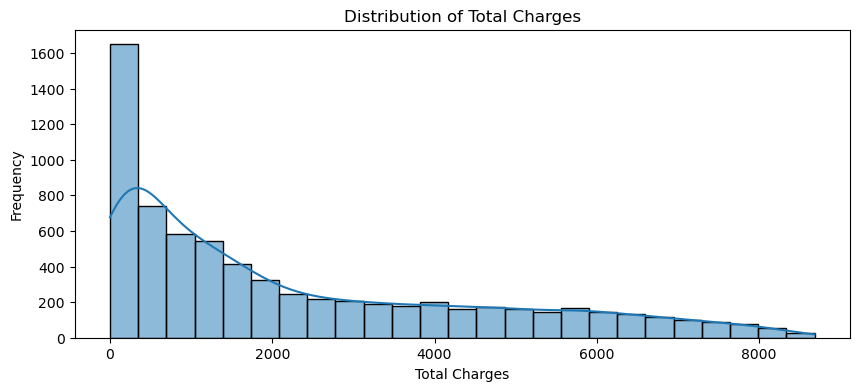

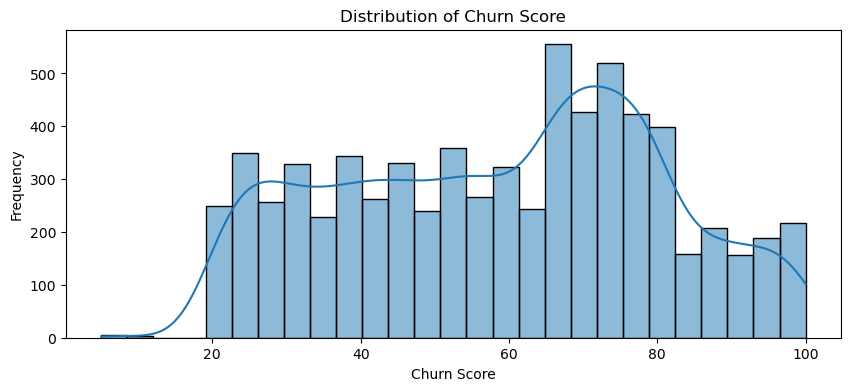

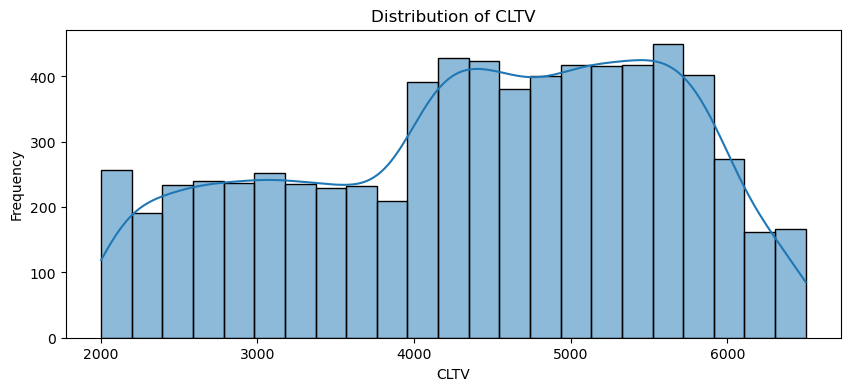

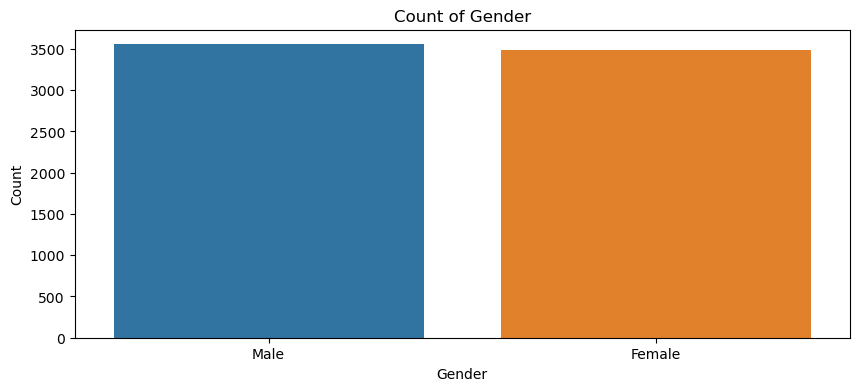

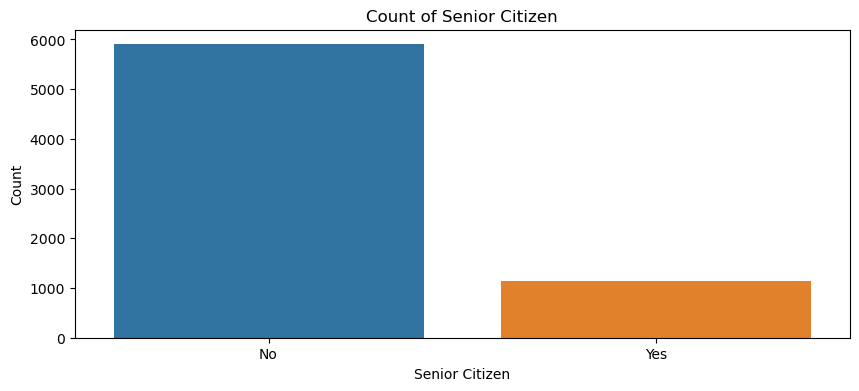

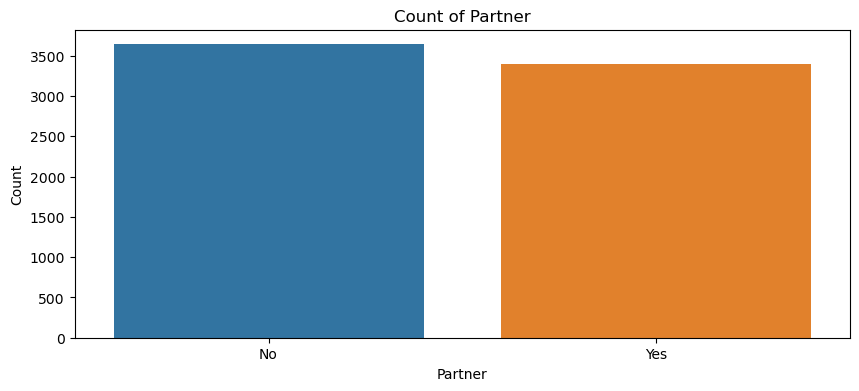

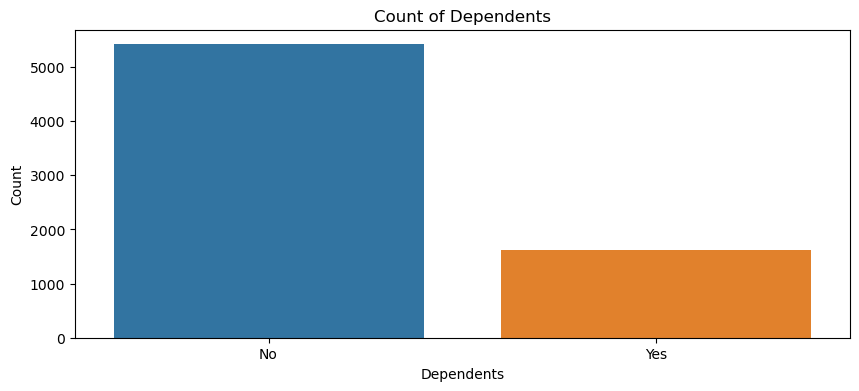

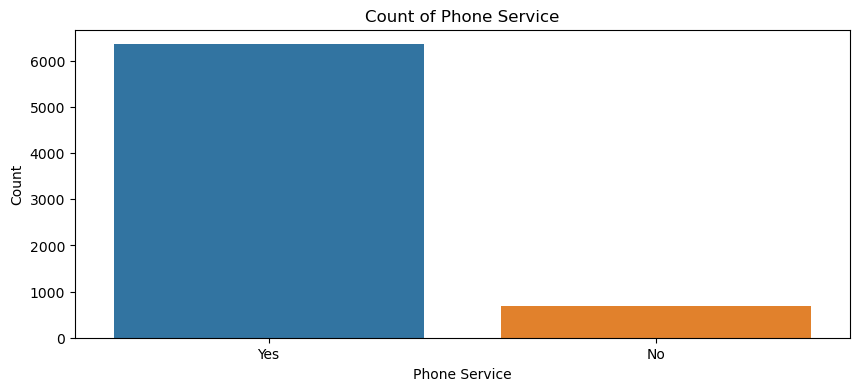

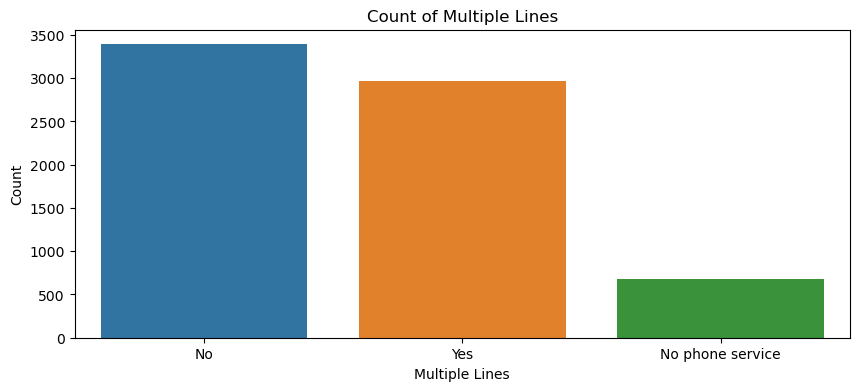

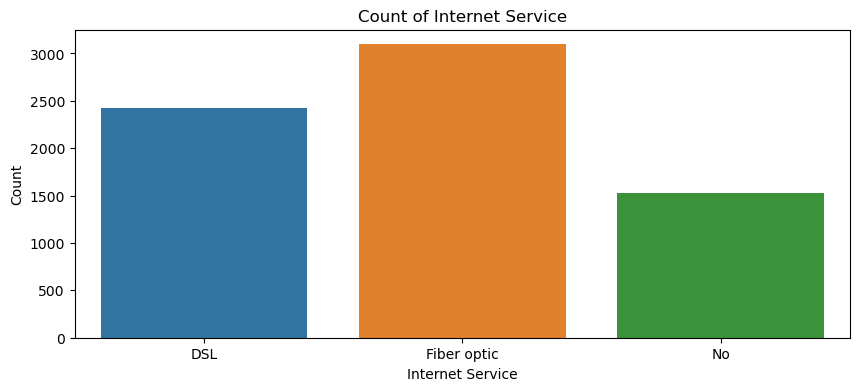

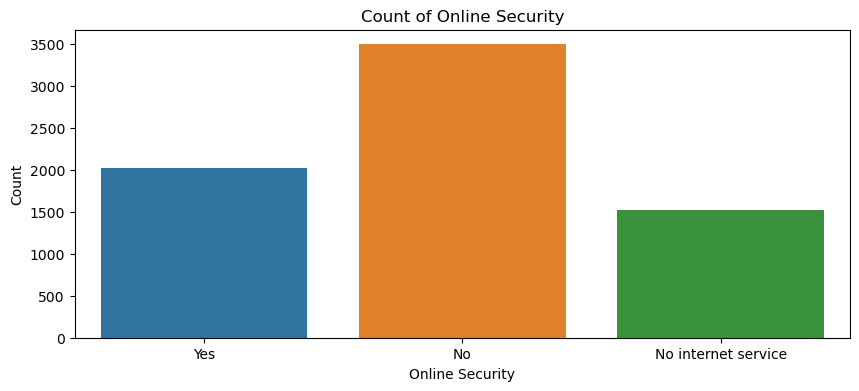

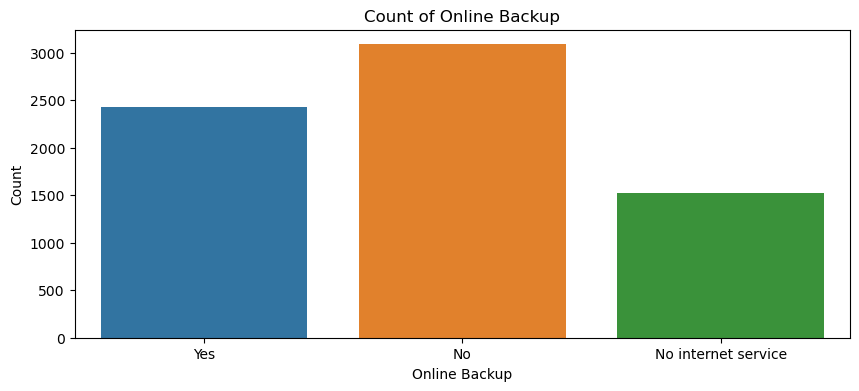

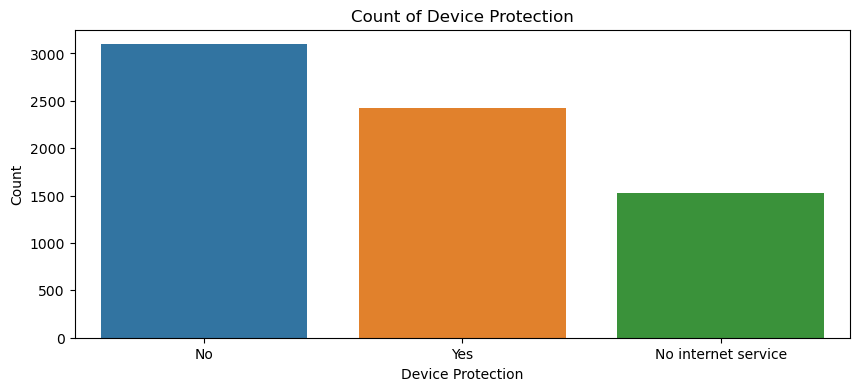

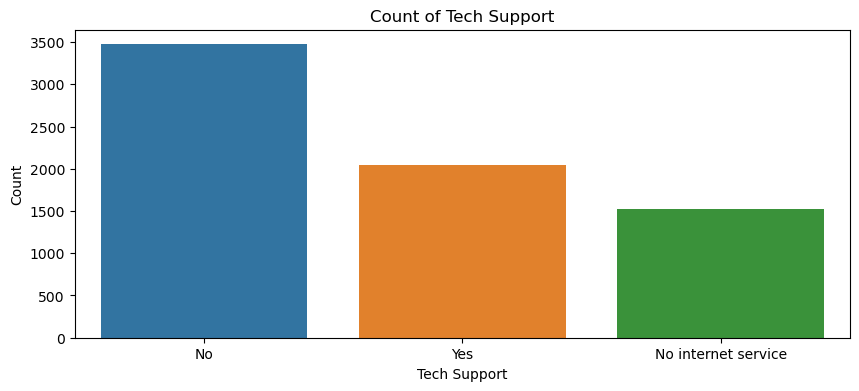

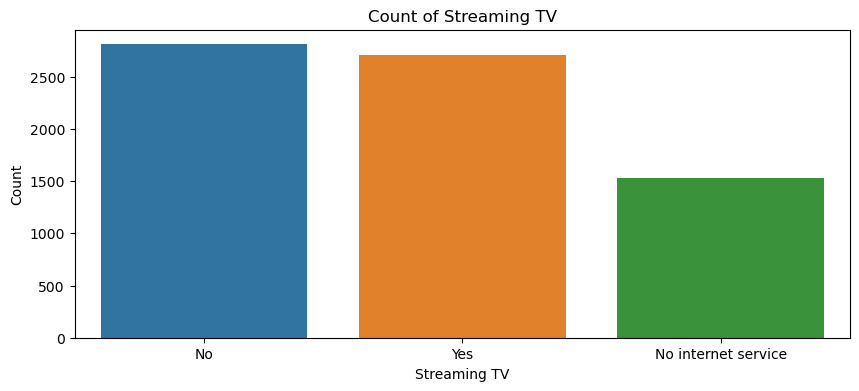

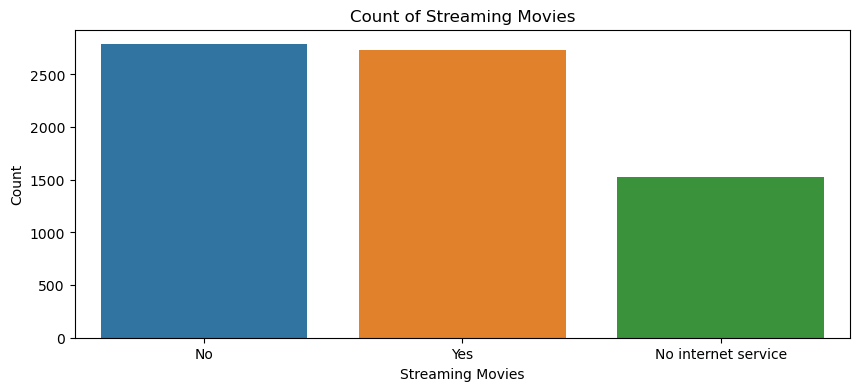

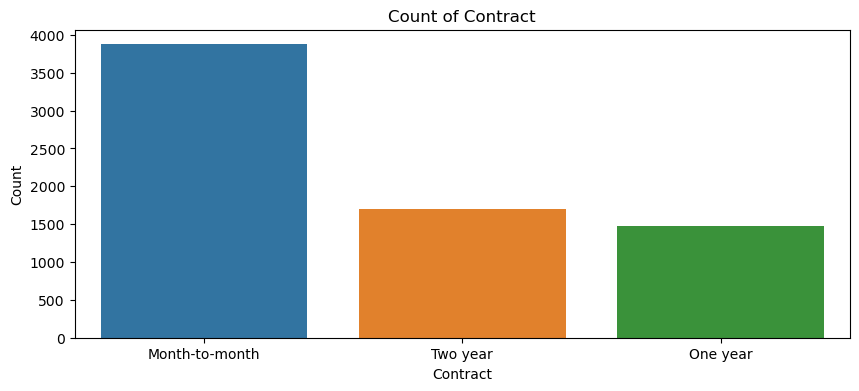

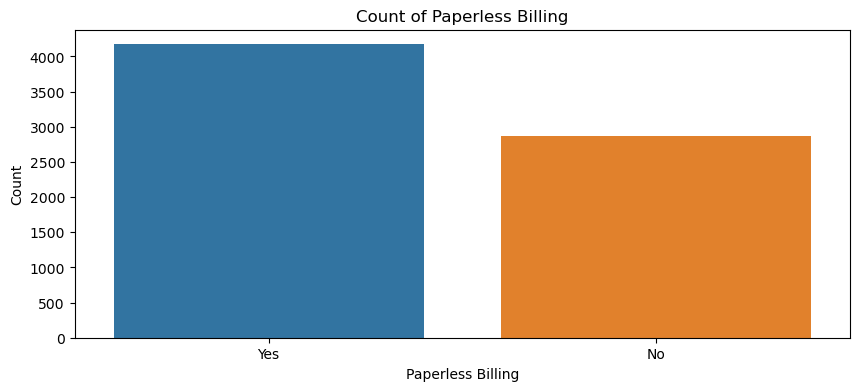

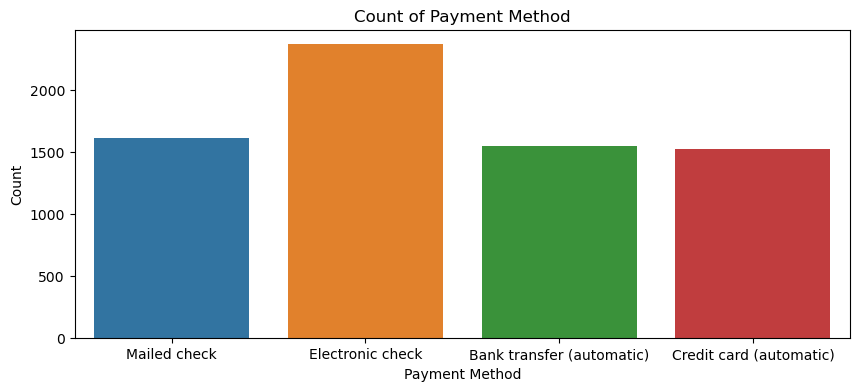

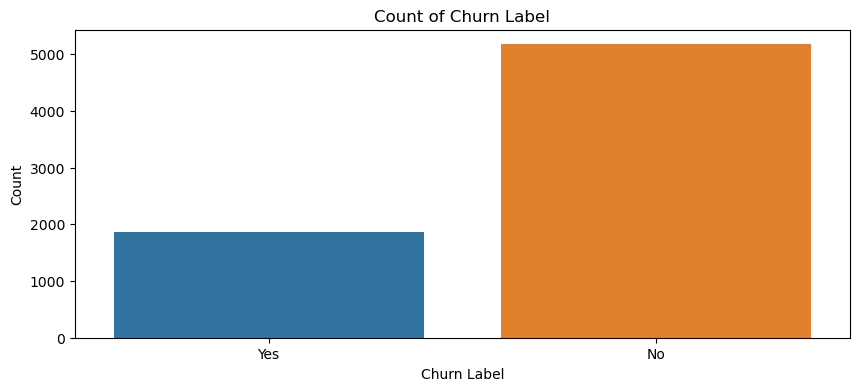

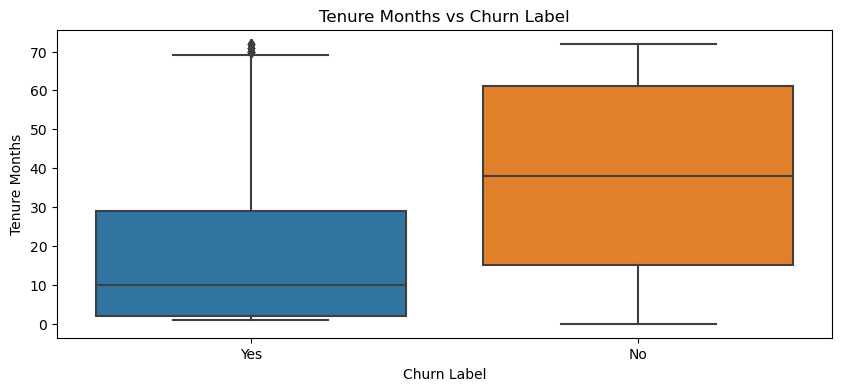

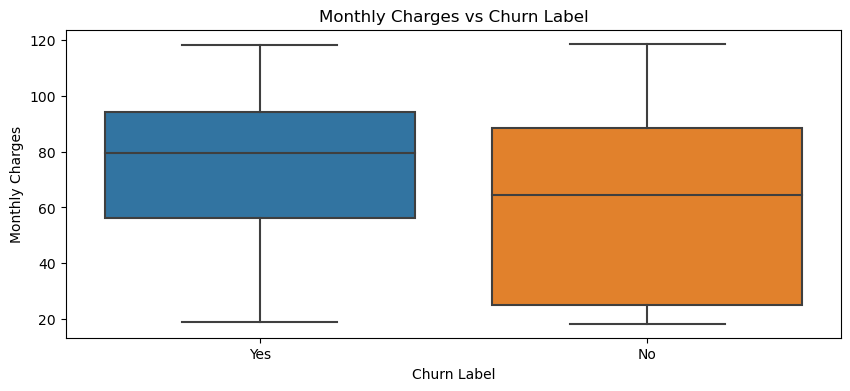

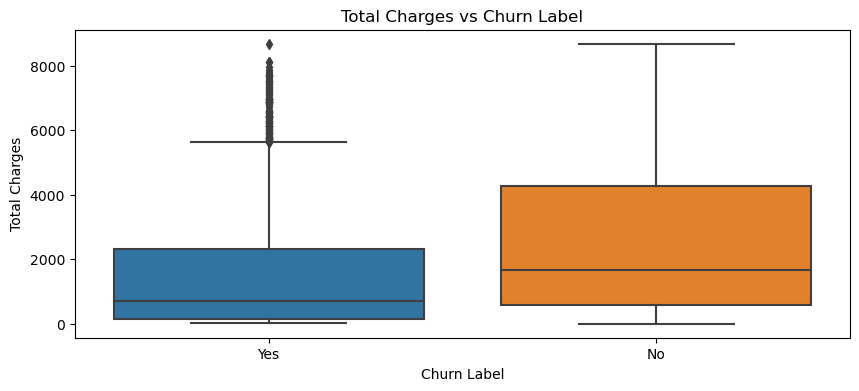

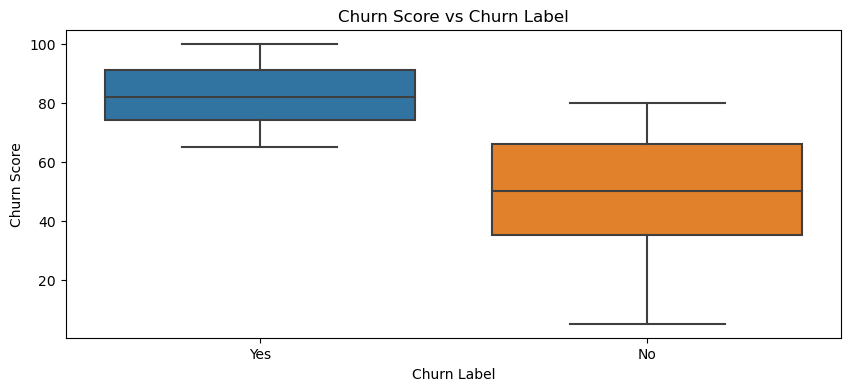

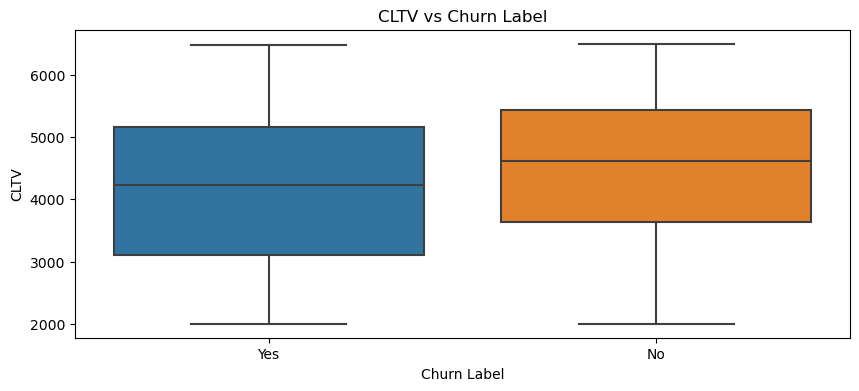

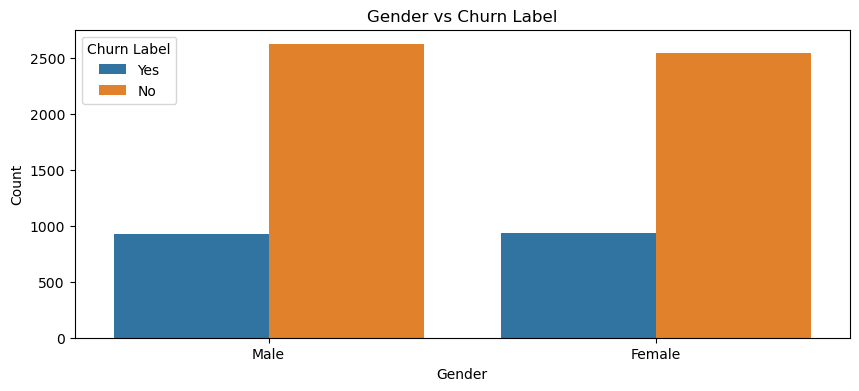

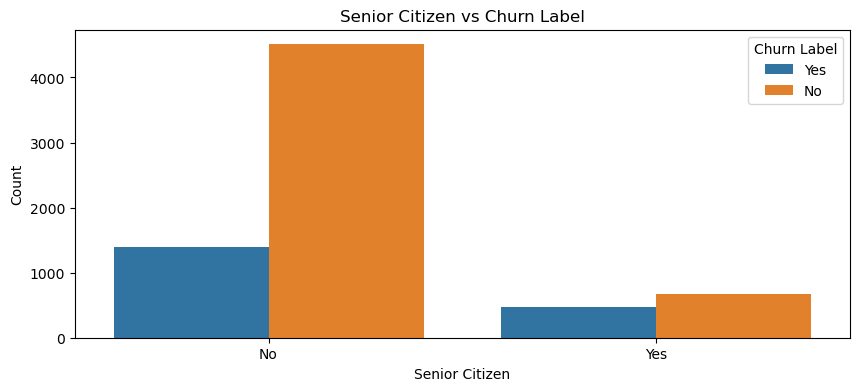

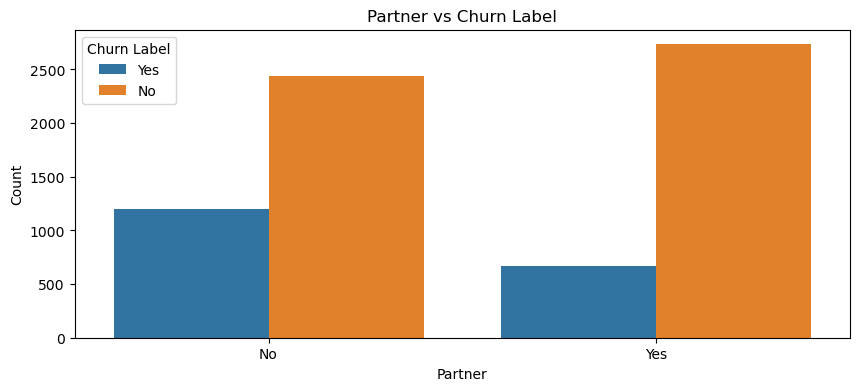

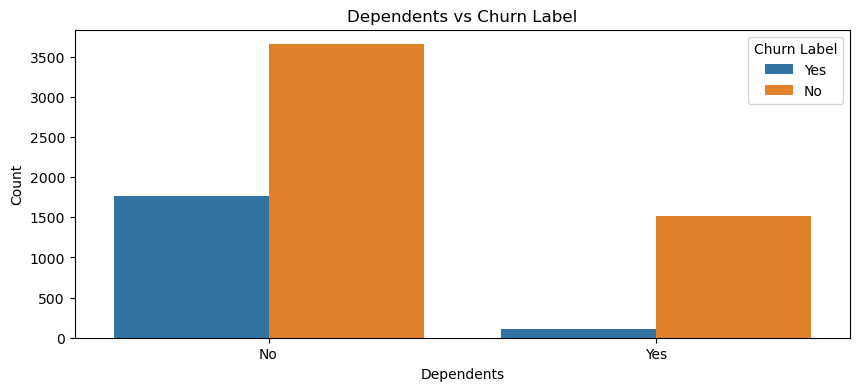

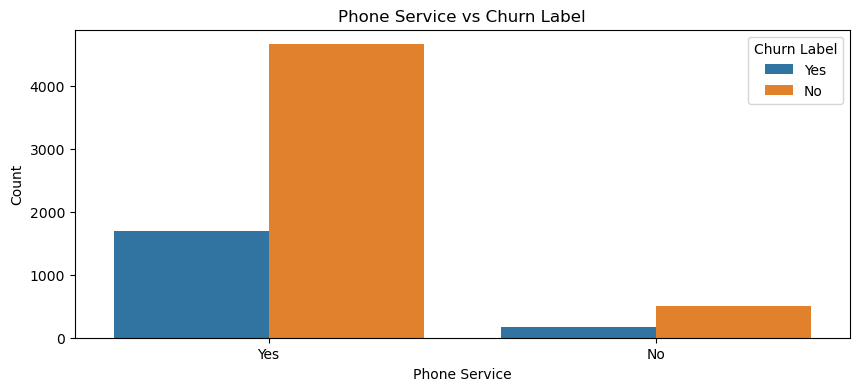

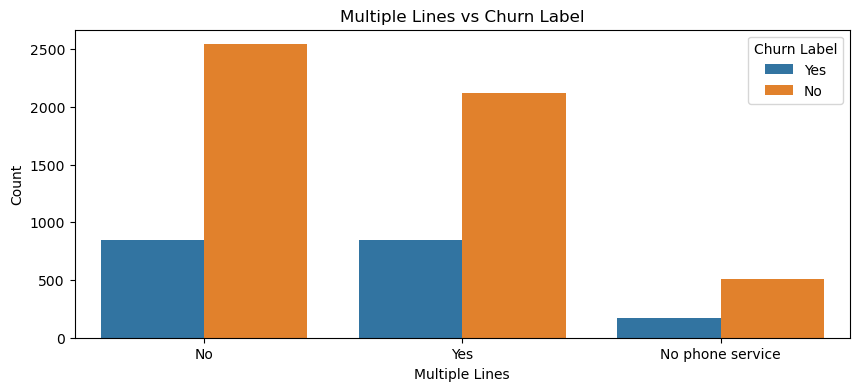

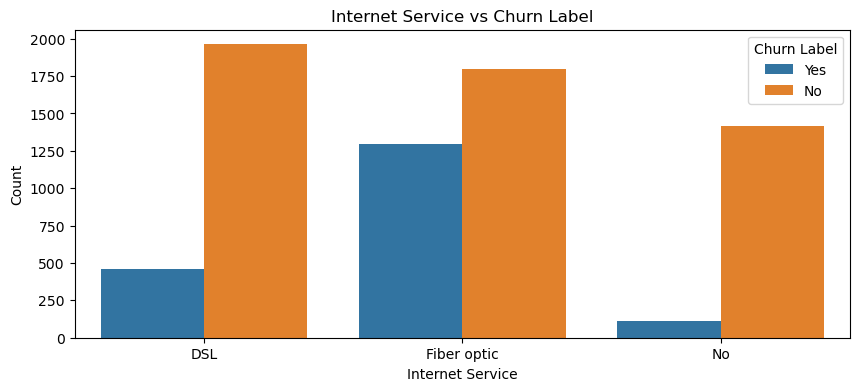

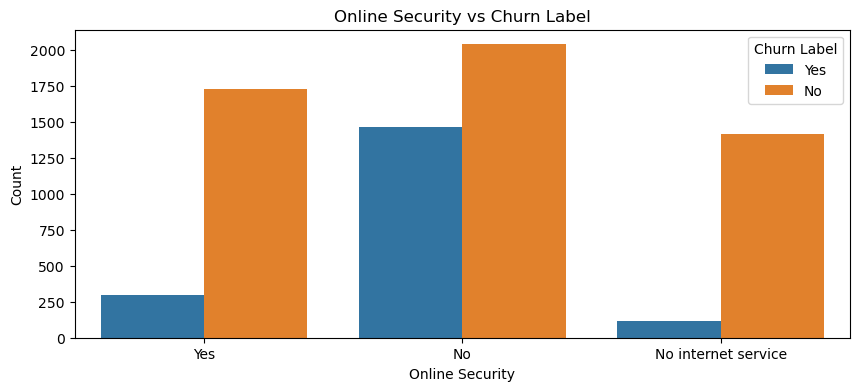

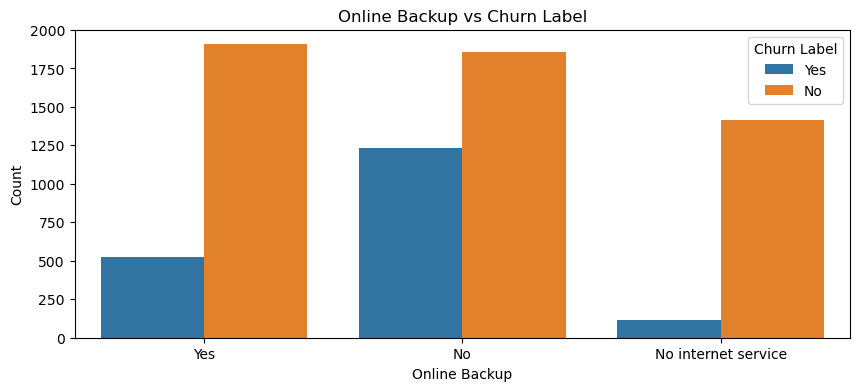

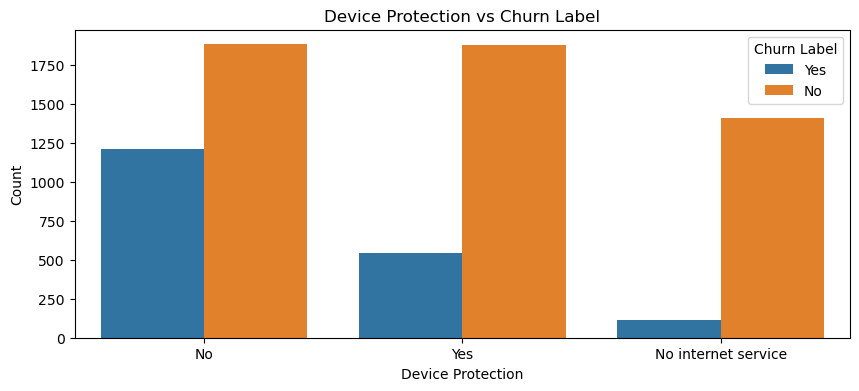

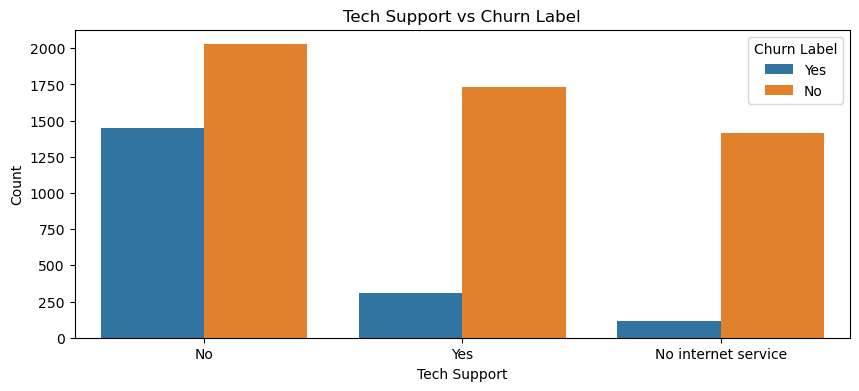

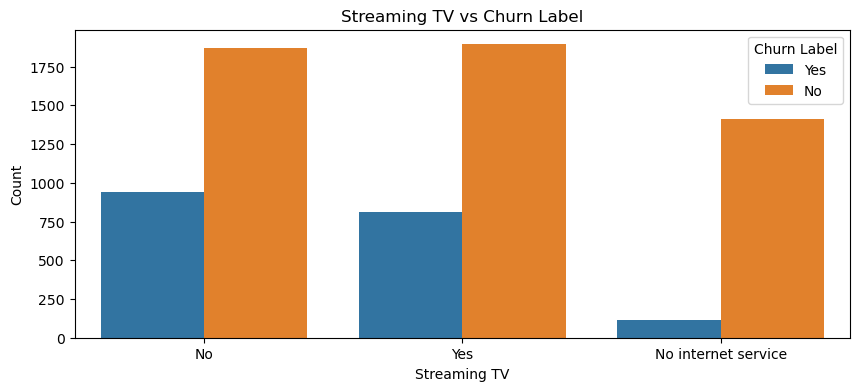

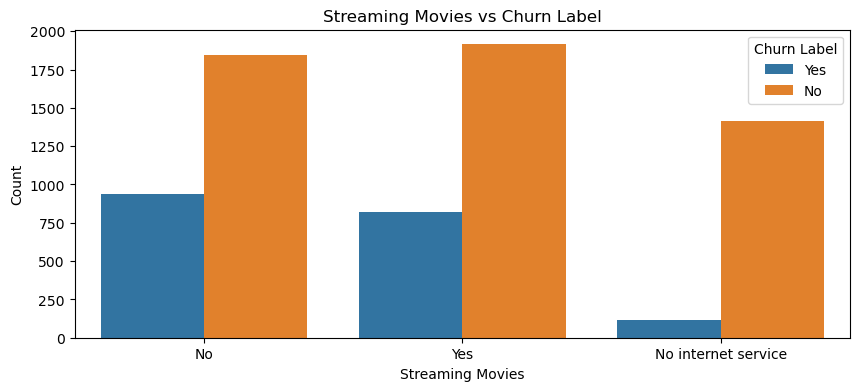

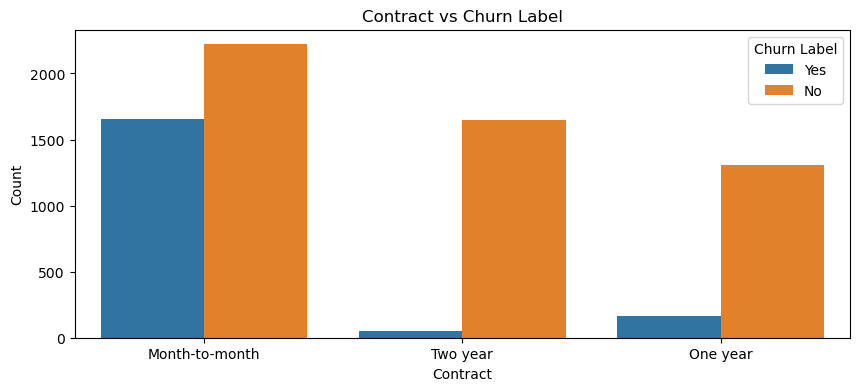

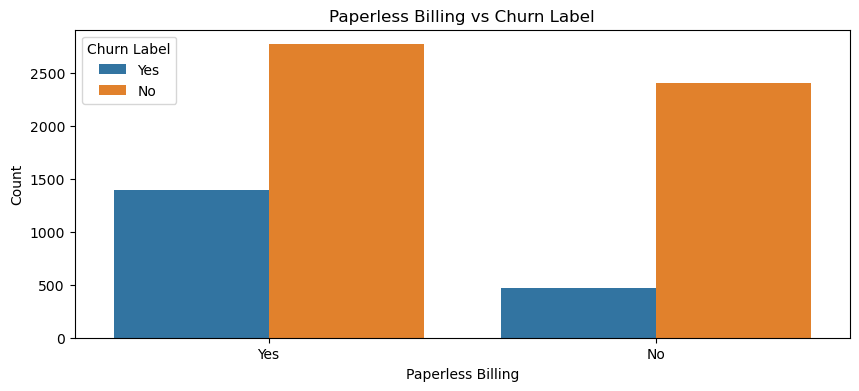

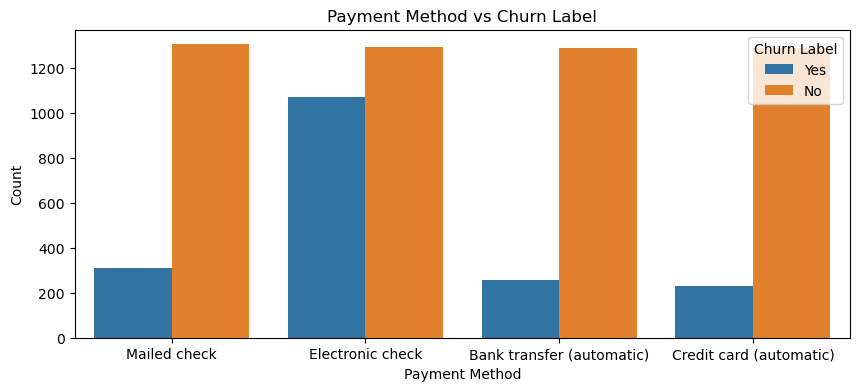

In [4]:
# Univariate Analysis

numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                        'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
                        'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
                        'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Bivariate Analysis

target_variable = 'Churn Label'

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=target_variable, y=feature, data=df)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()

for feature in categorical_features:
    if feature != 'Churn Label':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature, hue=target_variable, data=df)
        plt.title(f'{feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()


Machine Learning Modeling

Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Classifier trained successfully.
K-Nearest Neighbors trained successfully.
Logistic Regression - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Support Vector Classifier - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors - Accuracy: 0.9851, Precision: 0.9822, Recall: 0.9650, F1-Score: 0.9735


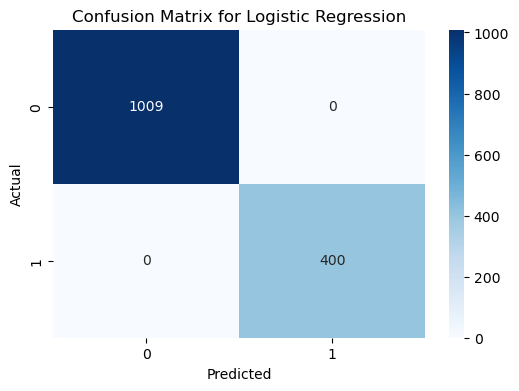

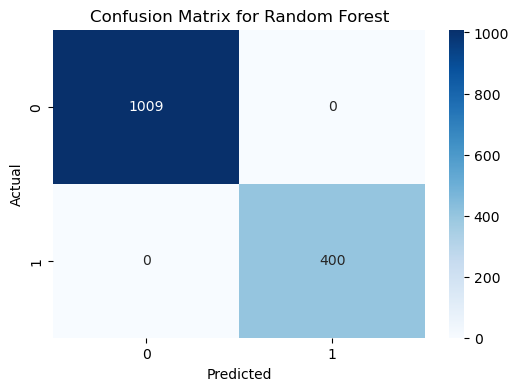

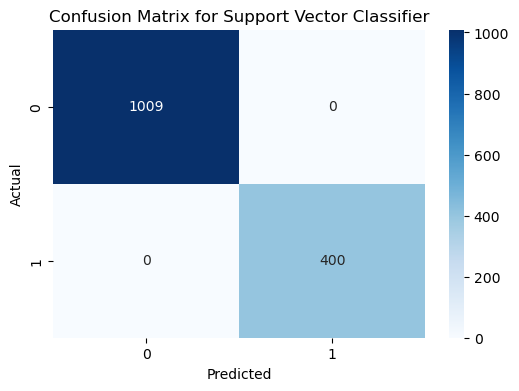

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


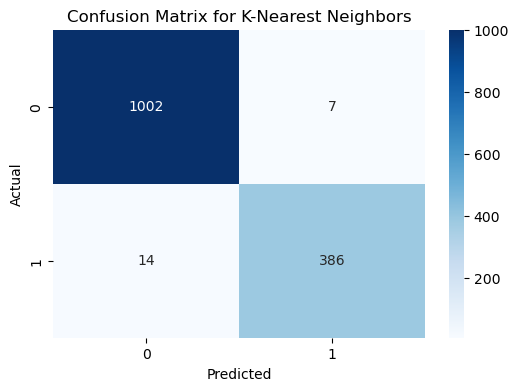

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Logistic Regression - Cross-Validation Accuracy: 0.9338 ± 0.0097
Random Forest - Cross-Validation Accuracy: 1.0000 ± 0.0000
Support Vector Classifier - Cross-Validation Accuracy: 0.7346 ± 0.0002


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

K-Nearest Neighbors - Cross-Validation Accuracy: 0.7751 ± 0.0033

Logistic Regression Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1009    0]
 [   0  400]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Random Forest Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1009    0]
 [   0  400]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00     

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [5]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Support Vector Classifier": svc_clf,
    "K-Nearest Neighbors": knn_clf
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate each model
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)

# Cross-Validation
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

for name, model in models.items():
    mean_score, std_dev = cross_validate_model(model, X, y)
    print(f"{name} - Cross-Validation Accuracy: {mean_score:.4f} ± {std_dev:.4f}")

# Classification Report
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


This complete workflow should ensure that the variables are defined correctly and the model training and evaluation processes are carried out smoothly. Let me know if you need any more assistance!